# Problem 1

In [1]:
# initial setup
import pandas as pd
orders_df = pd.read_csv("data/Orders.csv")
orders_df.head()
len(orders_df)

51290

In [2]:
# fix rownames
orders_df.columns = orders_df.columns.str.lower().str.replace(".", "_")
orders_df.columns


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'postal_code', 'city',
       'state', 'country', 'region', 'market', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [3]:
# problem 1, look at profit and sales 
print(orders_df.sales.head(5))
print(orders_df.profit.head(5))
# need to remove $ and convert from obj (very generic) to numeric

0      $221.98
1    $3,709.40
2    $5,175.17
3    $2,892.51
4    $2,832.96
Name: sales, dtype: object
0      $62.15
1    -$288.77
2     $919.97
3     -$96.54
4     $311.52
Name: profit, dtype: object


In [4]:
# fixed sales
orders_df.sales = pd.to_numeric(orders_df.sales.str.replace("$", "").str.replace(",",""))

In [5]:
# checking against NAs
orders_df.sales.head(5)
orders_df.sales.plot(kind='hist')
print(len(orders_df.sales))
print(orders_df.sales.head(10))

51290
0     221.98
1    3709.40
2    5175.17
3    2892.51
4    2832.96
5    2862.68
6    1822.08
7    5244.84
8     341.96
9      48.71
Name: sales, dtype: float64


In [6]:
#fix profit
orders_df.profit = pd.to_numeric(orders_df.profit.str.replace("$", "").str.replace(",",""))

In [7]:
orders_df.profit.head(5)


0     62.15
1   -288.77
2    919.97
3    -96.54
4    311.52
Name: profit, dtype: float64

In [8]:
orders_df.order_date.head(5)


0    11/11/14
1      2/5/14
2    10/17/14
3     1/28/14
4     11/5/14
Name: order_date, dtype: object

# Problem 2

In [9]:
#have to convert object to datetime 
#future reference, specifying format is faster
orders_df.order_date = pd.to_datetime(orders_df.order_date)
orders_df.ship_date = pd.to_datetime(orders_df.ship_date)

In [10]:
print(orders_df.order_date.head(2))
print(orders_df.ship_date.head(2))

0   2014-11-11
1   2014-02-05
Name: order_date, dtype: datetime64[ns]
0   2014-11-13
1   2014-02-07
Name: ship_date, dtype: datetime64[ns]


In [11]:
#mutate a new column for grouping by quarter
orders_df_2 = orders_df.order_date.dt.quarter
orders_df['order_quarter'] = orders_df_2

In [12]:
orders_df.quantity.head(2)


0    2
1    9
Name: quantity, dtype: int64

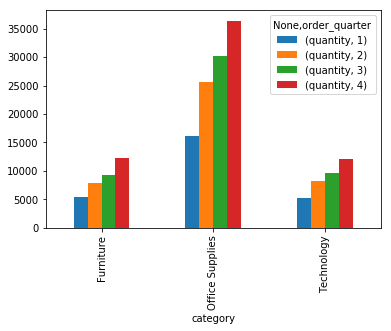

In [13]:
# investigating category, order_quarte
quarterly_orders = orders_df.groupby(['category', 'order_quarter'])[['quantity']].agg('sum')
quarterly_orders
quarterly_orders.unstack().plot(kind = 'bar')

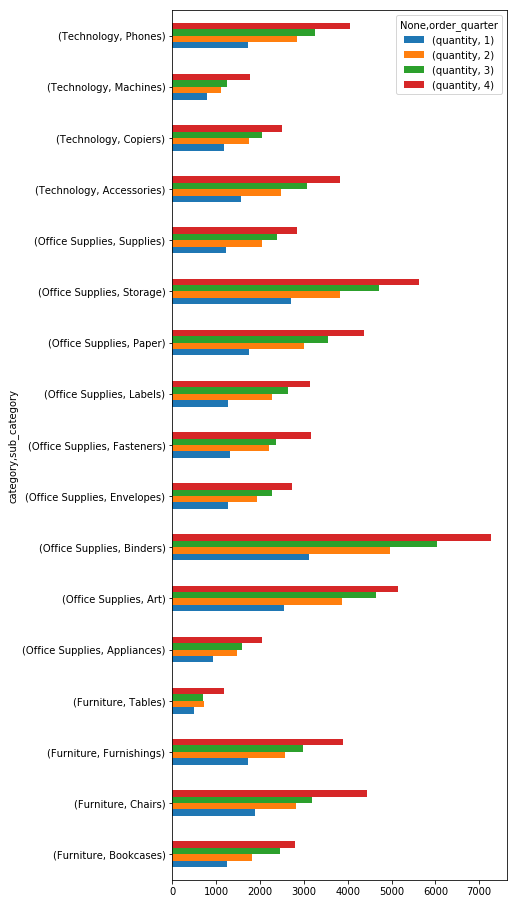

In [14]:
quarterly_sub_orders = orders_df.groupby(['category', 'sub_category', 'order_quarter'])[['quantity']].agg('sum')
quarterly_sub_orders
quarterly_sub_orders.unstack().plot(kind = 'barh', figsize=[6,16])

# Problem 3

In [15]:
returns_df = pd.read_csv("data/Returns.csv")
returns_df.columns = returns_df.columns.str.lower().str.replace(" ", "_")
returns_df.head()

,returned,order_id,region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [16]:
print(returns_df.returned.unique())
print(len(returns_df.returned))

['Yes']
1079


In [17]:
#join on order_id
combined_df = pd.merge(orders_df, returns_df, how = 'left', on = 'order_id')
print("The length of combined_df: " + str(len(combined_df)))
combined_df.head(5)

The length of combined_df: 51290


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,order_quarter,returned,region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,4,NaN,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,1,NaN,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,4,NaN,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1,NaN,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,4,NaN,NaN


In [18]:
#1. How much profit did we lose due to returns each year?

#mutate a new column for grouping by year
orders_year = orders_df.order_date.dt.year
combined_df['order_year'] = orders_year

In [19]:
#2. How many customer returned more than once? more than 5 times?




In [20]:
#3. Which regions are more likely to return orders?



In [21]:
#4. Which categories (sub-categories) of products are more likely to be returned?



# Problem 4

#### Step 1
First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.


In [22]:
#replace NaN with "No" inplace
combined_df.returned.fillna('No', inplace = True)
combined_df.returned.replace(('Yes','No'), (1,0), inplace = True)
combined_df.returned.head(2)

0    0
1    0
Name: returned, dtype: int64

In [23]:
combined_df.returned = combined_df.returned.astype('category')
combined_df.returned.head(2)

0    0
1    0
Name: returned, dtype: category
Categories (2, int64): [0, 1]

#### Step 2
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.


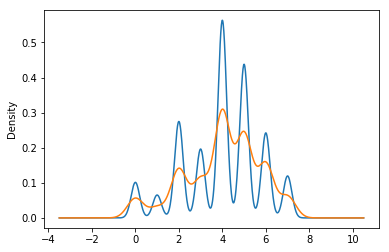

In [24]:
processing_time = combined_df.ship_date - combined_df.order_date
combined_df['process_time'] = processing_time.dt.days
elapsed = combined_df.groupby('returned')['process_time'].plot(kind = 'kde')

#### Step 3
- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID

In [25]:
mult_return = combined_df.groupby('product_id')[['returned']].sum()
mult_return

,returned
product_id,
FUR-BO-3174,0
FUR-BO-3175,0
FUR-BO-3176,1
FUR-BO-3177,0
FUR-BO-3409,0
FUR-BO-3615,1
FUR-BO-3616,1
FUR-BO-3617,0
FUR-BO-3618,0


In [26]:
# generate return counts
mult_return = mult_return.reset_index()

In [27]:
combined_df_2 = pd.merge(combined_df, mult_return, how = 'left', on = 'product_id')
combined_df_2

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,discount,profit,shipping_cost,order_priority,order_quarter,returned_x,region_y,order_year,process_time,returned_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.00,62.15,40.770,High,4,0,NaN,2014,2,0
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.10,-288.77,923.630,Critical,1,0,NaN,2014,2,2
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,0.10,919.97,915.490,Medium,4,0,NaN,2014,1,2
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,0.10,-96.54,910.160,Medium,1,0,NaN,2014,2,0
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,0.00,311.52,903.040,Critical,4,0,NaN,2014,1,0
5,22732,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,0.10,763.28,897.350,Critical,2,0,NaN,2014,3,1
6,30570,IN-2012-TS2134092-41219,2012-11-06,2012-11-08,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,0.00,564.84,894.770,Critical,4,0,NaN,2012,2,5
7,31192,IN-2013-MB1808592-41378,2013-04-14,2013-04-18,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,0.00,996.48,878.380,High,2,0,NaN,2013,4,0
8,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.00,54.71,25.270,High,4,0,NaN,2014,2,0
9,36258,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,0.20,5.48,11.130,High,1,0,NaN,2012,1,1


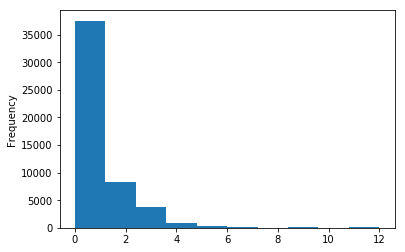

In [28]:
# fix na returns
combined_df_2.returned_y = combined_df_2.returned_y.fillna(0)
combined_df_2.returned_y.plot(kind = 'hist')

# Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Not that there are only less than 5% of the orders have been returned, so you should consider using the `createDataPartition` function from `caret` package that does a **stratified** random split of the data.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.

In [35]:
print(len(combined_df_2))
print(combined_df_2.columns)

51290
Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'postal_code', 'city',
       'state', 'country', 'region_x', 'market', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority', 'order_quarter',
       'returned_x', 'region_y', 'order_year', 'process_time', 'returned_y'],
      dtype='object')


In [36]:
combined_df_2

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,discount,profit,shipping_cost,order_priority,order_quarter,returned_x,region_y,order_year,process_time,returned_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.00,62.15,40.770,High,4,0,NaN,2014,2,0
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.10,-288.77,923.630,Critical,1,0,NaN,2014,2,2
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,0.10,919.97,915.490,Medium,4,0,NaN,2014,1,2
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,0.10,-96.54,910.160,Medium,1,0,NaN,2014,2,0
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,0.00,311.52,903.040,Critical,4,0,NaN,2014,1,0
5,22732,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,0.10,763.28,897.350,Critical,2,0,NaN,2014,3,1
6,30570,IN-2012-TS2134092-41219,2012-11-06,2012-11-08,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,0.00,564.84,894.770,Critical,4,0,NaN,2012,2,5
7,31192,IN-2013-MB1808592-41378,2013-04-14,2013-04-18,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,0.00,996.48,878.380,High,2,0,NaN,2013,4,0
8,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.00,54.71,25.270,High,4,0,NaN,2014,2,0
9,36258,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,0.20,5.48,11.130,High,1,0,NaN,2012,1,1


In [57]:
final_df = combined_df_2.iloc[:,[18,19,20,21,22,24,25]]
final_df.head()

,sales,quantity,discount,profit,shipping_cost,order_quarter,returned_x
0,221.98,2,0.0,62.15,40.77,4,0
1,3709.40,9,0.1,-288.77,923.63,1,0
2,5175.17,9,0.1,919.97,915.49,4,0
3,2892.51,5,0.1,-96.54,910.16,1,0
4,2832.96,8,0.0,311.52,903.04,4,0


In [61]:
import numpy as np
from sklearn.model_selection import train_test_split

X = final_df.iloc[:,0:5]
y = final_df.iloc[:,6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = final_df.returned_x)

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [71]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.956
Mean accuracy score: 0.956


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

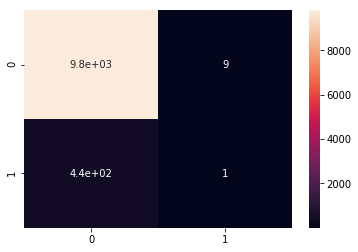

In [68]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=[0,1], index=[0,1])
sns.heatmap(cm, annot=True)

In [73]:
# save confusion matrix and slice into four pieces


confusion = confusion_matrix(y_test, predicted)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[9805    9]
 [ 443    1]]


In [76]:
1- (TN / (TN + FP))

0.0009170572651314712